# <center>Data Cleaning & Verification - Food Hygiene Rating Scheme in London</center>

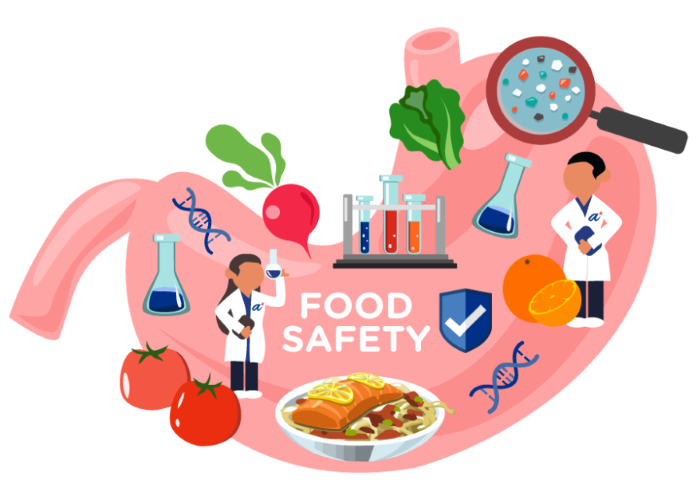

## 1. Introduction

The Food Hygiene Rating Scheme (FHRS) helps a consumer to choose where to eat out or shop for food by giving clear information about a businesses’ hygiene standards. The FHRS gives a business a rating from 5 to 0 which is displayed at their premises and online so that a consumer can make more informed choices about where to buy and eat food.

The food hygiene rating data published at [ratings.food.gov.uk](https://ratings.food.gov.uk/) was retrieved via an API in JSON format. The data provides the inspection result given to a business and reflect the standards of food hygiene found on the date of inspection or visit by the local authority. Businesses include restaurants, pubs, cafés, takeaways, hotels and other places consumers eat, as well as supermarkets and other food shops.

## 2. Retrieving the Data via an API

The first step was to retrieve a list of all local authorities in the UK and then filter this down to a list of local authorities in London. The ID codes for all local authorities in London were used to generate a pandas dataframe of all businesses in London registered on the FHRS.

In [1]:
# import the modules required for this project
import requests
import pandas as pd
import json
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [2]:
# make a get request to retrieve data of all local authorities in the UK
local_authorities = requests.get('https://ratings.food.gov.uk/authorities/json')

In [3]:
# convert the data into python objects using the .json() method
local_authorities_json = local_authorities.json()

In [4]:
# We dont need all the objects in the dictionary, select the keys which we require
local_authorities_json['ArrayOfWebLocalAuthorityAPI']['WebLocalAuthorityAPI'][0]

{'LocalAuthorityId': '-1',
 'LocalAuthorityIdCode': '^',
 'Name': 'All',
 'FriendlyName': None,
 'Url': None,
 'SchemeUrl': None,
 'Email': None,
 'RegionName': None,
 'FileName': None,
 'FileNameWelsh': None,
 'EstablishmentCount': '1',
 'CreationDate': {'@xsi:nil': 'true'},
 'LastPublishedDate': {'@xsi:nil': 'true'},
 'SchemeType': '0'}

In [5]:
# convert the python objects back into a string
local_authorities_string = json.dumps(local_authorities_json['ArrayOfWebLocalAuthorityAPI']['WebLocalAuthorityAPI'])

In [6]:
# use the StringIO function to set the string as a file object
local_authorities_string_io = StringIO(local_authorities_string)

In [7]:
# read the file object into a pandas dataframe
local_authorities_df = pd.read_json(local_authorities_string_io)

In [8]:
# this project only requires analysis of businesses in London
london_authorities_df = local_authorities_df[local_authorities_df['RegionName'] == 'London'].copy()

In [9]:
london_authorities_df.head(3)

,LocalAuthorityId,LocalAuthorityIdCode,Name,FriendlyName,Url,SchemeUrl,Email,RegionName,FileName,FileNameWelsh,EstablishmentCount,CreationDate,LastPublishedDate,SchemeType
20,88,501,Barking and Dagenham,barking-and-dagenham,http://www.lbbd.gov.uk/Pages/Home.aspx,None,foodsafety@lbbd.gov.uk,London,http://ratings.food.gov.uk/OpenDataFiles/FHRS5...,NaN,1318,2010-08-17T15:30:24.87,2021-09-02T00:30:48.37,1
21,89,502,Barnet,barnet,http://www.barnet.gov.uk/,None,FoodSafety@barnet.gov.uk,London,http://ratings.food.gov.uk/OpenDataFiles/FHRS5...,NaN,2567,2010-08-17T15:30:24.87,2021-09-03T00:30:46.87,1
30,90,503,Bexley,bexley,http://www.bexley.gov.uk,None,food.safety@bexley.gov.uk,London,http://ratings.food.gov.uk/OpenDataFiles/FHRS5...,NaN,1620,2010-08-17T15:30:24.87,2021-09-08T00:30:59.09,1


In [10]:
# convert the LocalAuthorityIdCode column to a list
london_authority_id_codes = london_authorities_df['LocalAuthorityIdCode'].to_list()

In [11]:
# view the list
london_authority_id_codes

['501',
 '502',
 '503',
 '504',
 '505',
 '506',
 '508',
 '507',
 '509',
 '510',
 '511',
 '512',
 '513',
 '514',
 '515',
 '516',
 '517',
 '518',
 '519',
 '520',
 '521',
 '522',
 '523',
 '524',
 '525',
 '526',
 '527',
 '528',
 '529',
 '530',
 '531',
 '532',
 '533']

In [12]:
# make a get request for all local authorities in london
# convert the json data into dataframe and append to a list

list_of_london_la_dfs = []
for id_code in london_authority_id_codes:
    url = 'https://ratings.food.gov.uk/OpenDataFiles/FHRS{}en-GB.json'.format(id_code)
    london_local_authority_response = requests.get(url)
    # we must decode this data using utf-8-sig otherwise a UTF-8 BOM error will be raised
    decoded_data = london_local_authority_response.content.decode('utf-8-sig')
    london_local_authority_data_json = json.loads(decoded_data)
    london_la_businesses = london_local_authority_data_json['FHRSEstablishment']['EstablishmentCollection']
    london_la_businesses_string = json.dumps(london_la_businesses)
    london_la_businesses_string_io = StringIO(london_la_businesses_string)
    london_la_df = pd.read_json(london_la_businesses_string_io)
    list_of_london_la_dfs.append(london_la_df)

In [13]:
# concatenate all the data frames into one data frame
all_london_businesses_df = pd.concat(list_of_london_la_dfs)
pd.set_option("display.max_columns", None)
all_london_businesses_df.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine4,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Geocode,RightToReply,AddressLine3
0,833717,67282,1st Steps Day Nursery Ltd,Hospitals/Childcare/Caring Premises,5,Wantz Library,Rainham Road North,Dagenham,RM10 7DX,4,fhrs_4_en-GB,2021-07-09,501,Barking and Dagenham,http://www.lbbd.gov.uk/Pages/Home.aspx,foodsafety@lbbd.gov.uk,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM...",FHRS,False,"{'Longitude': '0.16007800000000', 'Latitude': ...",NaN,NaN
1,1269275,26663,212 Lounge,Retailers - other,4613,NaN,212 High Road,Chadwell Heath,RM6 6LS,AwaitingInspection,fhrs_awaitinginspection_en-GB,None,501,Barking and Dagenham,http://www.lbbd.gov.uk/Pages/Home.aspx,foodsafety@lbbd.gov.uk,None,FHRS,False,"{'Longitude': '0.14113410000000', 'Latitude': ...",NaN,NaN
2,1340226,76964,3 Sweet Mrs,Manufacturers/packers,7839,NaN,30 Church Street,Dagenham,RM10 9UR,4,fhrs_4_en-GB,2021-06-30,501,Barking and Dagenham,http://www.lbbd.gov.uk/Pages/Home.aspx,foodsafety@lbbd.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,False,"{'Longitude': '0.16055940000000', 'Latitude': ...",NaN,NaN
3,1205500,75208,3D Food & Wine LTD T/A Westbury News,Retailers - other,4613,NaN,180-184 Ripple Road,Barking,IG11 7PR,4,fhrs_4_en-GB,2019-10-12,501,Barking and Dagenham,http://www.lbbd.gov.uk/Pages/Home.aspx,foodsafety@lbbd.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,False,"{'Longitude': '0.08583400000000', 'Latitude': ...",NaN,NaN
4,781761,66970,5 Elm's Cafe,Restaurant/Cafe/Canteen,1,NaN,309 Wood Lane,Dagenham,RM8 3NH,4,fhrs_4_en-GB,2019-12-02,501,Barking and Dagenham,http://www.lbbd.gov.uk/Pages/Home.aspx,foodsafety@lbbd.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,False,"{'Longitude': '0.14242100000000', 'Latitude': ...",NaN,NaN


## 3. Cleaning the Data

In [14]:
# drop the columns that do not provide any relevant data
cols_to_drop = ['LocalAuthorityBusinessID', 'BusinessName', 'AddressLine1', 'AddressLine2', 'AddressLine4', 
                'RatingKey', 'LocalAuthorityWebSite', 'LocalAuthorityEmailAddress', 'SchemeType', 'NewRatingPending', 
                'Geocode', 'RightToReply', 'AddressLine3']

In [15]:
all_london_businesses_df.drop(columns=cols_to_drop, inplace=True)

In [16]:
all_london_businesses_df.head(1)

,FHRSID,BusinessType,BusinessTypeID,PostCode,RatingValue,RatingDate,LocalAuthorityCode,LocalAuthorityName,Scores
0,833717,Hospitals/Childcare/Caring Premises,5,RM10 7DX,4,2021-07-09,501,Barking and Dagenham,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM..."


In [17]:
all_london_businesses_df['RatingValue'].value_counts()

5                      39420
4                      13673
AwaitingInspection      9929
3                       7074
Exempt                  3181
2                       1890
1                       1486
0                        198
AwaitingPublication        4
Name: RatingValue, dtype: int64

The majority of businesses in our dataframe have a rating of 5. There are many businesses who are `AwaitingInspection`, `Exempt` or `AwaitingPublication`. Lets drop these businesses from our dataframe as we want to convert the `RatingValue` column to the numerical type.

In [18]:
# create boolean masks
awaiting_inspection = all_london_businesses_df['RatingValue'] != 'AwaitingInspection'
exempt = all_london_businesses_df['RatingValue'] != 'Exempt'
awaiting_publication = all_london_businesses_df['RatingValue'] != 'AwaitingPublication'

# filter the dataframe using boolean masks
all_london_businesses_df = all_london_businesses_df[(awaiting_inspection) & (exempt) & (awaiting_publication)]

In [19]:
all_london_businesses_df.head()

,FHRSID,BusinessType,BusinessTypeID,PostCode,RatingValue,RatingDate,LocalAuthorityCode,LocalAuthorityName,Scores
0,833717,Hospitals/Childcare/Caring Premises,5,RM10 7DX,4,2021-07-09,501,Barking and Dagenham,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM..."
2,1340226,Manufacturers/packers,7839,RM10 9UR,4,2021-06-30,501,Barking and Dagenham,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM..."
3,1205500,Retailers - other,4613,IG11 7PR,4,2019-10-12,501,Barking and Dagenham,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM..."
4,781761,Restaurant/Cafe/Canteen,1,RM8 3NH,4,2019-12-02,501,Barking and Dagenham,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn..."
6,115956,Retailers - other,4613,RM8 3UB,3,2020-07-28,501,Barking and Dagenham,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn..."


In [20]:
# reset the index of the filtered dataframe
all_london_businesses_df.reset_index(drop=True, inplace=True)

In [21]:
# check index has been reset
all_london_businesses_df.head()

,FHRSID,BusinessType,BusinessTypeID,PostCode,RatingValue,RatingDate,LocalAuthorityCode,LocalAuthorityName,Scores
0,833717,Hospitals/Childcare/Caring Premises,5,RM10 7DX,4,2021-07-09,501,Barking and Dagenham,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM..."
1,1340226,Manufacturers/packers,7839,RM10 9UR,4,2021-06-30,501,Barking and Dagenham,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM..."
2,1205500,Retailers - other,4613,IG11 7PR,4,2019-10-12,501,Barking and Dagenham,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM..."
3,781761,Restaurant/Cafe/Canteen,1,RM8 3NH,4,2019-12-02,501,Barking and Dagenham,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn..."
4,115956,Retailers - other,4613,RM8 3UB,3,2020-07-28,501,Barking and Dagenham,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn..."


In [22]:
# check if all rating values are now integers and there are no strings
all_london_businesses_df['RatingValue'].value_counts()

5    39420
4    13673
3     7074
2     1890
1     1486
0      198
Name: RatingValue, dtype: int64

In [23]:
# convert RatingValue column to numeical type
all_london_businesses_df['RatingValue'] = pd.to_numeric(all_london_businesses_df['RatingValue'])

In [24]:
# view the Scores column
pd.set_option('display.max_colwidth', None)
all_london_businesses_df['Scores']

0         {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 10}
1         {'Hygiene': 0, 'Structural': 0, 'ConfidenceInManagement': 10}
2         {'Hygiene': 0, 'Structural': 0, 'ConfidenceInManagement': 10}
3         {'Hygiene': 5, 'Structural': 10, 'ConfidenceInManagement': 5}
4        {'Hygiene': 10, 'Structural': 5, 'ConfidenceInManagement': 10}
                                      ...                              
63736      {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 5}
63737      {'Hygiene': 5, 'Structural': 0, 'ConfidenceInManagement': 5}
63738      {'Hygiene': 0, 'Structural': 5, 'ConfidenceInManagement': 0}
63739                                                              None
63740      {'Hygiene': 0, 'Structural': 0, 'ConfidenceInManagement': 5}
Name: Scores, Length: 63741, dtype: object

The `Scores` column contains dictionaries and NoneType data (refer to index 63628). We must fill the NoneType data with a dictionary that contains null values (np.nan). Lets define a function that will do this.

In [25]:
def fill_empty_scores(x):
    
    dict_with_empty_scores = {"Hygiene": np.nan, "Structural": np.nan, "ConfidenceInManagement": np.nan}
    
    if type(x) is dict:
        return x
    else:
        return dict_with_empty_scores

In [26]:
all_london_businesses_df['Scores'] = all_london_businesses_df['Scores'].apply(fill_empty_scores)

In [27]:
# check if NoneType data has been filled in
all_london_businesses_df['Scores']

0             {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 10}
1             {'Hygiene': 0, 'Structural': 0, 'ConfidenceInManagement': 10}
2             {'Hygiene': 0, 'Structural': 0, 'ConfidenceInManagement': 10}
3             {'Hygiene': 5, 'Structural': 10, 'ConfidenceInManagement': 5}
4            {'Hygiene': 10, 'Structural': 5, 'ConfidenceInManagement': 10}
                                        ...                                
63736          {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 5}
63737          {'Hygiene': 5, 'Structural': 0, 'ConfidenceInManagement': 5}
63738          {'Hygiene': 0, 'Structural': 5, 'ConfidenceInManagement': 0}
63739    {'Hygiene': nan, 'Structural': nan, 'ConfidenceInManagement': nan}
63740          {'Hygiene': 0, 'Structural': 0, 'ConfidenceInManagement': 5}
Name: Scores, Length: 63741, dtype: object

In [28]:
# We can now expand the Scores column to its 3 constituent components
scores_df = pd.json_normalize(all_london_businesses_df['Scores'])

In [29]:
# rename the 3 columns
column_mapper = {'Hygiene': 'Hygiene_score', 'Structural': 'Structural_score', 
                 'ConfidenceInManagement': 'ConfidenceInManagement_score'}

scores_df.rename(columns=column_mapper, inplace=True)

In [30]:
# concatenate the 3 constituent columns to the dataframe and drop the original Scores column
all_london_businesses_df = pd.concat([all_london_businesses_df, scores_df], axis=1)
all_london_businesses_df.drop(columns='Scores', inplace=True)

In [31]:
# check the final result
all_london_businesses_df.head(1)

,FHRSID,BusinessType,BusinessTypeID,PostCode,RatingValue,RatingDate,LocalAuthorityCode,LocalAuthorityName,Hygiene_score,Structural_score,ConfidenceInManagement_score
0,833717,Hospitals/Childcare/Caring Premises,5,RM10 7DX,4,2021-07-09,501,Barking and Dagenham,5.0,5.0,10.0


In [32]:
# change the rating date into rating year
all_london_businesses_df['RatingDate'] = all_london_businesses_df['RatingDate'].str[:4]
all_london_businesses_df.rename(columns={'RatingDate':'RatingYear'}, inplace=True)

## 4. Verifying the Rating Values

Now we will check if the `RatingValue` column is correct based on the `Hygiene_score`, `Structural_score`, `ConfidenceInManagement_score` and `Total_score` columns.

In [33]:
# calculate the total score based on the 3 constituent score columns
all_london_businesses_df['Total_score'] = (all_london_businesses_df['Hygiene_score'] 
                                           + all_london_businesses_df['Structural_score'] 
                                           + all_london_businesses_df['ConfidenceInManagement_score'])

In [34]:
all_london_businesses_df.head()

,FHRSID,BusinessType,BusinessTypeID,PostCode,RatingValue,RatingYear,LocalAuthorityCode,LocalAuthorityName,Hygiene_score,Structural_score,ConfidenceInManagement_score,Total_score
0,833717,Hospitals/Childcare/Caring Premises,5,RM10 7DX,4,2021,501,Barking and Dagenham,5.0,5.0,10.0,20.0
1,1340226,Manufacturers/packers,7839,RM10 9UR,4,2021,501,Barking and Dagenham,0.0,0.0,10.0,10.0
2,1205500,Retailers - other,4613,IG11 7PR,4,2019,501,Barking and Dagenham,0.0,0.0,10.0,10.0
3,781761,Restaurant/Cafe/Canteen,1,RM8 3NH,4,2019,501,Barking and Dagenham,5.0,10.0,5.0,20.0
4,115956,Retailers - other,4613,RM8 3UB,3,2020,501,Barking and Dagenham,10.0,5.0,10.0,25.0


In [35]:
# create a dataframe for checking of rating values
# filter this new dataframe to ensure there no null values in the Total_score column
df_rating_check = all_london_businesses_df[all_london_businesses_df['Total_score'].notnull()].copy()
df_rating_check = df_rating_check[['FHRSID', 'RatingValue', 'Hygiene_score', 'Structural_score', 
                                   'ConfidenceInManagement_score', 'Total_score']]
df_rating_check

,FHRSID,RatingValue,Hygiene_score,Structural_score,ConfidenceInManagement_score,Total_score
0,833717,4,5.0,5.0,10.0,20.0
1,1340226,4,0.0,0.0,10.0,10.0
2,1205500,4,0.0,0.0,10.0,10.0
3,781761,4,5.0,10.0,5.0,20.0
4,115956,3,10.0,5.0,10.0,25.0
...,...,...,...,...,...,...
63735,427731,5,0.0,5.0,5.0,10.0
63736,766875,5,5.0,5.0,5.0,15.0
63737,412775,5,5.0,0.0,5.0,10.0
63738,413469,5,0.0,5.0,0.0,5.0


Lets define a function which calculates the true rating value based on the last 4 columns on the dataframe above. The logic we will use is shown in the image below:

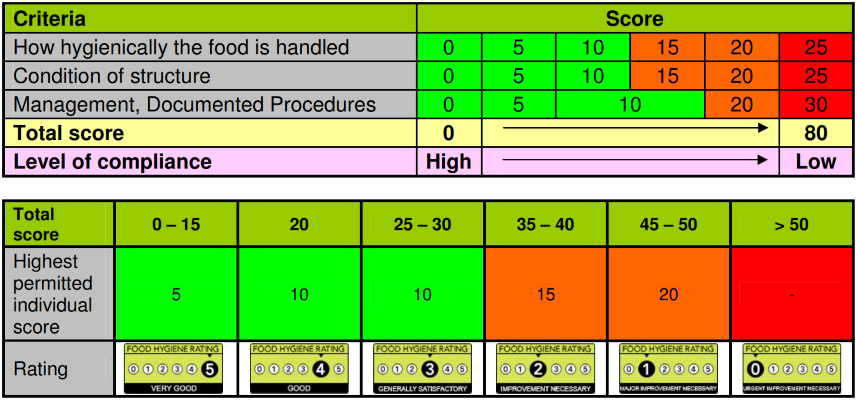

It is important to note that a business may score 0, 15, 0 for `Hygiene_score`, `Structural_score` and `ConfidenceInManagement_score` respectively. It is very easy to assume that this business would then have a rating value of 5 because the `Total_score` is equal to 15. This is incorrect because the highest permitted individual score has been exceeded. A business scoring 0, 15, 0 will actually be awarded a rating value of 2.

In [36]:
def rating_value_calc(row):
    
    # Total score lower than or equal to 15 
    if row['Total_score'] <= 15 and (row['Hygiene_score'] <= 5 
                                       and row['Structural_score'] <= 5 
                                       and row['ConfidenceInManagement_score'] <= 5):
        return 5
    
    elif row['Total_score'] <= 15 and (row['Hygiene_score'] <= 10 
                                       and row['Structural_score'] <= 10 
                                       and row['ConfidenceInManagement_score'] <= 10):
        return 4
    
    elif row['Total_score'] <= 15 and (row['Hygiene_score'] <= 15 
                                       and row['Structural_score'] <= 15 
                                       and row['ConfidenceInManagement_score'] <= 15):
        return 2
    
    # Total score equal to 20 
    elif row['Total_score'] == 20 and (row['Hygiene_score'] <= 10 
                                       and row['Structural_score'] <= 10 
                                       and row['ConfidenceInManagement_score'] <= 10):
        return 4
    
    elif row['Total_score'] == 20 and (row['Hygiene_score'] <= 15 
                                       and row['Structural_score'] <= 15 
                                       and row['ConfidenceInManagement_score'] <= 15):
        return 2
    
    elif row['Total_score'] == 20 and (row['Hygiene_score'] <= 20 
                                       and row['Structural_score'] <= 20 
                                       and row['ConfidenceInManagement_score'] <= 20):
        return 1

    # Total score between 25 and 30 
    elif 25 <= row['Total_score'] <= 30 and (row['Hygiene_score'] <= 10 
                                             and row['Structural_score'] <= 10 
                                             and row['ConfidenceInManagement_score'] <= 10):
        return 3
    
    elif 25 <= row['Total_score'] <= 30 and (row['Hygiene_score'] <= 15 
                                             and row['Structural_score'] <= 15 
                                             and row['ConfidenceInManagement_score'] <= 15):
        return 2
    
    elif 25 <= row['Total_score'] <= 30 and (row['Hygiene_score'] <= 20 
                                             and row['Structural_score'] <= 20 
                                             and row['ConfidenceInManagement_score'] <= 20):
        return 1
    
    # Total score between 35 and 40 
    elif 35 <= row['Total_score'] <= 40 and (row['Hygiene_score'] <= 15 
                                             and row['Structural_score'] <= 15 
                                             and row['ConfidenceInManagement_score'] <= 15):
        return 2
    
    elif 35 <= row['Total_score'] <= 40 and (row['Hygiene_score'] <= 20 
                                             and row['Structural_score'] <= 20 
                                             and row['ConfidenceInManagement_score'] <= 20):
        return 1
    
    # Total score between 45 and 50 
    elif 45 <= row['Total_score'] <= 50 and (row['Hygiene_score'] <= 20 
                                             and row['Structural_score'] <= 20 
                                             and row['ConfidenceInManagement_score'] <= 20):
        return 1
    
    # Total score above 50 or individual scores above 20
    else:
        return 0

In [37]:
# apply the rating_value_calc function to each row
df_rating_check['manual_check'] = df_rating_check.apply(rating_value_calc, axis=1)

In [38]:
df_rating_check.head()

,FHRSID,RatingValue,Hygiene_score,Structural_score,ConfidenceInManagement_score,Total_score,manual_check
0,833717,4,5.0,5.0,10.0,20.0,4
1,1340226,4,0.0,0.0,10.0,10.0,4
2,1205500,4,0.0,0.0,10.0,10.0,4
3,781761,4,5.0,10.0,5.0,20.0,4
4,115956,3,10.0,5.0,10.0,25.0,3


Now lets check if the `RatingValue	` and `manual_check` columns are equal.

In [39]:
if df_rating_check['RatingValue'].equals(df_rating_check['manual_check']):
    print("The 'RatingValue' column is correct")
else:
    print("The 'RatingValue' column is incorrect")

The 'RatingValue' column is correct


## 5. Types of Businesses Registered with the FHRS

In [40]:
# group together all the different business types and normalise them to get a percentage value
dict_business_types = (all_london_businesses_df['BusinessType'].value_counts(normalize=True) * 100).to_dict()

dict_business_types

{'Restaurant/Cafe/Canteen': 32.644608650633025,
 'Retailers - other': 18.821480679625356,
 'Takeaway/sandwich shop': 12.160148099339514,
 'Other catering premises': 9.91983181939411,
 'Pub/bar/nightclub': 6.542100061185109,
 'Hospitals/Childcare/Caring Premises': 6.167145165592005,
 'School/college/university': 4.745768029996392,
 'Retailers - supermarkets/hypermarkets': 3.0514111796175145,
 'Mobile caterer': 2.6215465712806516,
 'Hotel/bed & breakfast/guest house': 1.634740590828509,
 'Manufacturers/packers': 1.096625405939662,
 'Distributors/Transporters': 0.41574496791703924,
 'Importers/Exporters': 0.13805870632716777,
 'Farmers/growers': 0.04079007232393593}

In [41]:
# group together all elements in the dictionary whose value is less than 2 and name this group 'Other'
dict_business_types_new = {}
for key, group in itertools.groupby(dict_business_types, lambda k: 'Other' if (dict_business_types[k] < 2) else k):
     dict_business_types_new[key] = sum([dict_business_types[k] for k in list(group)])   

labels = dict_business_types_new.keys()
sizes = dict_business_types_new.values()

In [42]:
# check the new dictionary
dict_business_types_new

{'Restaurant/Cafe/Canteen': 32.644608650633025,
 'Retailers - other': 18.821480679625356,
 'Takeaway/sandwich shop': 12.160148099339514,
 'Other catering premises': 9.91983181939411,
 'Pub/bar/nightclub': 6.542100061185109,
 'Hospitals/Childcare/Caring Premises': 6.167145165592005,
 'School/college/university': 4.745768029996392,
 'Retailers - supermarkets/hypermarkets': 3.0514111796175145,
 'Mobile caterer': 2.6215465712806516,
 'Other': 3.3259597433363144}

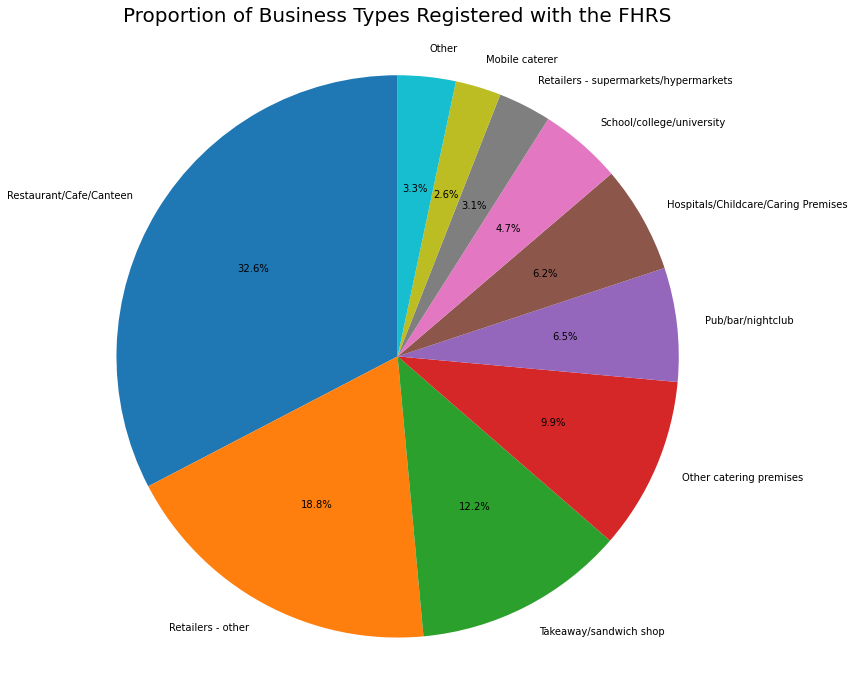

In [43]:
fig, ax = plt.subplots(figsize=(11, 9))

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.tight_layout()
ax.set_title('Proportion of Business Types Registered with the FHRS', y=1.0, pad=25, fontsize= 20, weight=400)

plt.show()

We can see that the majority of businesses registered with the FHRS are of the `Restaurant/Cafe/Canteen` type and account for almost one third of all business types.

## 6. Best and Worst Performing Local Authorities in London

In [44]:
# group by local authrity and calculate the mean
grouped_by_local_authority = (all_london_businesses_df
              .groupby(['LocalAuthorityName'])
              .agg({'RatingValue': 'mean'})
             )

In [45]:
# sort the rating values from highest to lowest
grouped_by_local_authority_sorted = grouped_by_local_authority.sort_values('RatingValue', ascending=False)

In [46]:
# show the top 5
grouped_by_local_authority_sorted.head(5)

,RatingValue
LocalAuthorityName,
Kensington and Chelsea,4.765615
City of London Corporation,4.708231
Greenwich,4.659439
Haringey,4.548232
Hammersmith and Fulham,4.545814


In [47]:
# show the bottom 5
grouped_by_local_authority_sorted.tail(5)

,RatingValue
LocalAuthorityName,
Camden,4.129660
Islington,4.114838
Newham,4.111059
Ealing,4.088526
Waltham Forest,3.946132


We can see that the two best performing local authorities are `Kensington and Chelsea` and `City of London Corporation` with both having an average `RatingValue` of over 4.7

The worst performing local authority is `Waltham Forest	` and has an average `RatingValue` that is lower than 4.

## 7. Average Rating by Business Type

In [48]:
# group by business type and calculate the mean
grouped_by_business_type = (all_london_businesses_df
              .groupby(['BusinessType'])
              .agg({'RatingValue': 'mean'})
             )

In [49]:
# sort the rating values from highest to lowest
grouped_by_business_type_sorted = grouped_by_business_type.sort_values('RatingValue', ascending=False)

In [50]:
grouped_by_business_type_sorted

,RatingValue
BusinessType,
School/college/university,4.833719
Hospitals/Childcare/Caring Premises,4.762147
Retailers - supermarkets/hypermarkets,4.674036
Farmers/growers,4.653846
Other catering premises,4.628183
Mobile caterer,4.582286
Hotel/bed & breakfast/guest house,4.569098
Distributors/Transporters,4.475472
Pub/bar/nightclub,4.469065


The `School/college/university` and `Hospitals/Childcare/Caring Premises` business types have the highest average `RatingValue`.

## 8. Distribution of Restaurants, Cafes and Canteens across London Sub-regions

We have already established that almost one third of all business types in London are of the `Restaurant/Cafe/Canteen` business type. Lets investigate further and establish where most of these business types are located in London.

In [51]:
# list all the local authorities in london
all_london_businesses_df['LocalAuthorityName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London Corporation', 'Croydon', 'Ealing',
       'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
       'Islington', 'Kensington and Chelsea', 'Kingston-Upon-Thames',
       'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond-Upon-Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

The local authorities shown above can be grouped into London sub-regions. See image below: 

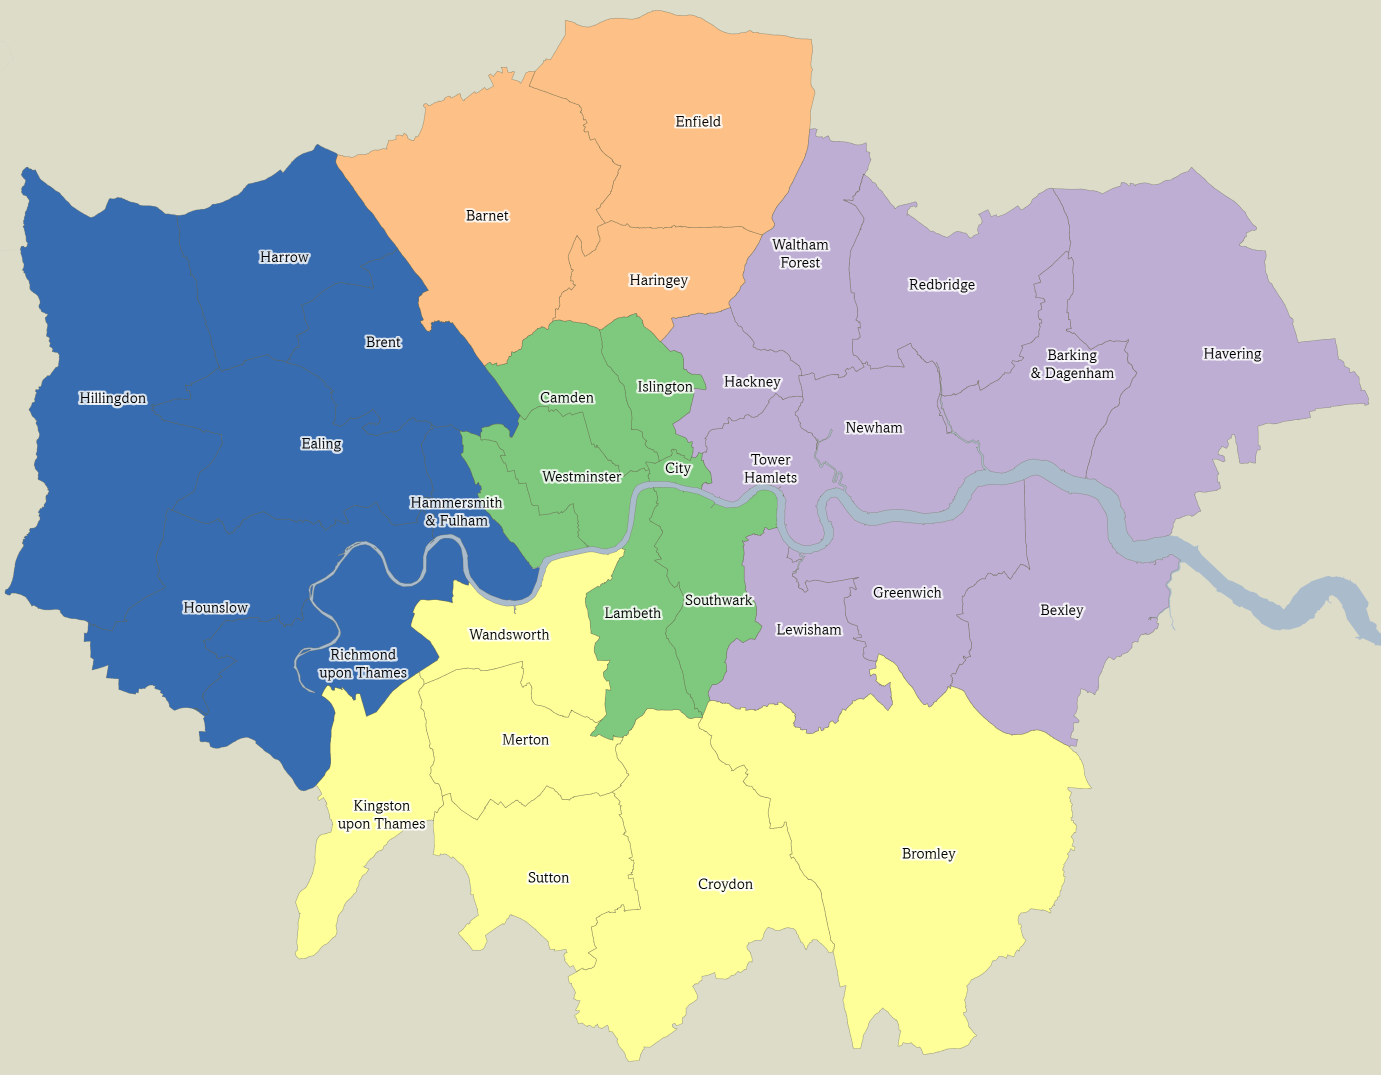

In [52]:
#define a function which returns a sub-region based on the local authority
def add_sub_region(x):
    
    central = ['Camden', 'City of London Corporation', 'Kensington and Chelsea', 
           'Islington', 'Lambeth', 'Southwark', 'Westminster']

    east = ['Barking and Dagenham', 'Bexley', 'Greenwich', 'Hackney', 'Havering', 'Lewisham', 
        'Newham', 'Redbridge', 'Tower Hamlets', 'Waltham Forest']

    north = ['Barnet', 'Enfield', 'Haringey']

    south = ['Bromley', 'Croydon', 'Kingston-Upon-Thames', 'Merton', 'Sutton', 'Wandsworth']

    west = ['Brent', 'Ealing', 'Hammersmith and Fulham', 'Harrow', 'Richmond-Upon-Thames', 'Hillingdon', 'Hounslow']
    
    if x in central:
        return 'central'
    
    elif x in east:
        return 'east'
    
    elif x in north:
        return 'north'
    
    elif x in south:
        return 'south'
    
    else:
        return 'west'

In [53]:
# apply the add_sub_region function
all_london_businesses_df['sub_region'] = all_london_businesses_df['LocalAuthorityName'].apply(add_sub_region)

all_london_businesses_df.head()

,FHRSID,BusinessType,BusinessTypeID,PostCode,RatingValue,RatingYear,LocalAuthorityCode,LocalAuthorityName,Hygiene_score,Structural_score,ConfidenceInManagement_score,Total_score,sub_region
0,833717,Hospitals/Childcare/Caring Premises,5,RM10 7DX,4,2021,501,Barking and Dagenham,5.0,5.0,10.0,20.0,east
1,1340226,Manufacturers/packers,7839,RM10 9UR,4,2021,501,Barking and Dagenham,0.0,0.0,10.0,10.0,east
2,1205500,Retailers - other,4613,IG11 7PR,4,2019,501,Barking and Dagenham,0.0,0.0,10.0,10.0,east
3,781761,Restaurant/Cafe/Canteen,1,RM8 3NH,4,2019,501,Barking and Dagenham,5.0,10.0,5.0,20.0,east
4,115956,Retailers - other,4613,RM8 3UB,3,2020,501,Barking and Dagenham,10.0,5.0,10.0,25.0,east


In [54]:
# filter the data frame to show only the Restaurant/Cafe/Canteen business type
all_london_restaurants_df = (all_london_businesses_df
                            [all_london_businesses_df['BusinessType'] == 'Restaurant/Cafe/Canteen'].copy())

In [55]:
all_london_restaurants_df.head()

,FHRSID,BusinessType,BusinessTypeID,PostCode,RatingValue,RatingYear,LocalAuthorityCode,LocalAuthorityName,Hygiene_score,Structural_score,ConfidenceInManagement_score,Total_score,sub_region
3,781761,Restaurant/Cafe/Canteen,1,RM8 3NH,4,2019,501,Barking and Dagenham,5.0,10.0,5.0,20.0,east
6,1294578,Restaurant/Cafe/Canteen,1,RM6 6AP,4,2021,501,Barking and Dagenham,10.0,5.0,0.0,15.0,east
8,1030088,Restaurant/Cafe/Canteen,1,RM9 4QS,3,2020,501,Barking and Dagenham,10.0,10.0,10.0,30.0,east
10,1084611,Restaurant/Cafe/Canteen,1,IG11 8EU,4,2019,501,Barking and Dagenham,0.0,10.0,10.0,20.0,east
14,1048202,Restaurant/Cafe/Canteen,1,IG11 7HW,5,2018,501,Barking and Dagenham,5.0,0.0,0.0,5.0,east


In [56]:
# group the businesses by sub region and calculate the count in each group
all_restaurants_grouped_by_subregion = (all_london_restaurants_df
              .groupby('sub_region')
              .agg({'FHRSID':'count'})
             )

In [57]:
# convert the count into a proportion and rename the column accordingly
all_restaurants_grouped_by_subregion.rename(columns={'FHRSID':'proportion'}, inplace=True)
prop_restaurants_london = all_restaurants_grouped_by_subregion.apply(lambda x: (100 * x / x.sum()))

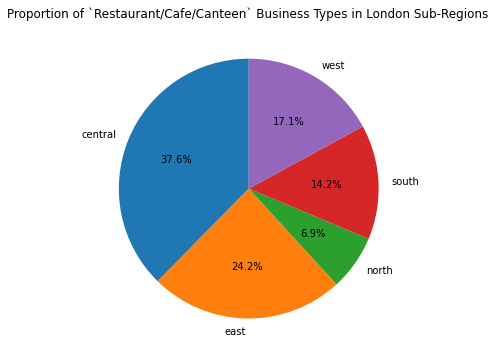

In [58]:
sizes = prop_restaurants_london['proportion']
labels = prop_restaurants_london.index


fig, ax = plt.subplots(figsize=(5,5))

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.tight_layout()
ax.set_title('Proportion of `Restaurant/Cafe/Canteen` Business Types in London Sub-Regions')

plt.show()

The majority of `Restaurant/Cafe/Canteen` business types are located in central London.

## 9. Performance of Business Types Across London Sub-regions

In [59]:
avg_rating_subregion_btype = pd.pivot_table(
    all_london_businesses_df, 
    values="RatingValue",
    index="BusinessType",
    columns="sub_region", 
    aggfunc=np.mean
)

In [60]:
avg_rating_subregion_btype

sub_region,central,east,north,south,west
BusinessType,,,,,
Distributors/Transporters,4.720930,4.278351,4.605263,4.577778,4.452381
Farmers/growers,4.333333,4.500000,3.000000,5.000000,5.000000
Hospitals/Childcare/Caring Premises,4.774000,4.732778,4.731982,4.850187,4.734104
Hotel/bed & breakfast/guest house,4.517007,4.648276,4.388889,4.695652,4.646409
Importers/Exporters,4.692308,4.043478,4.666667,4.375000,4.586207
Manufacturers/packers,4.403509,4.452941,4.511905,4.362500,4.386454
Mobile caterer,4.450000,4.620079,4.466019,4.672619,4.591022
Other catering premises,4.573367,4.634587,4.658385,4.641118,4.639053
Pub/bar/nightclub,4.417012,4.409505,4.501695,4.589916,4.531361


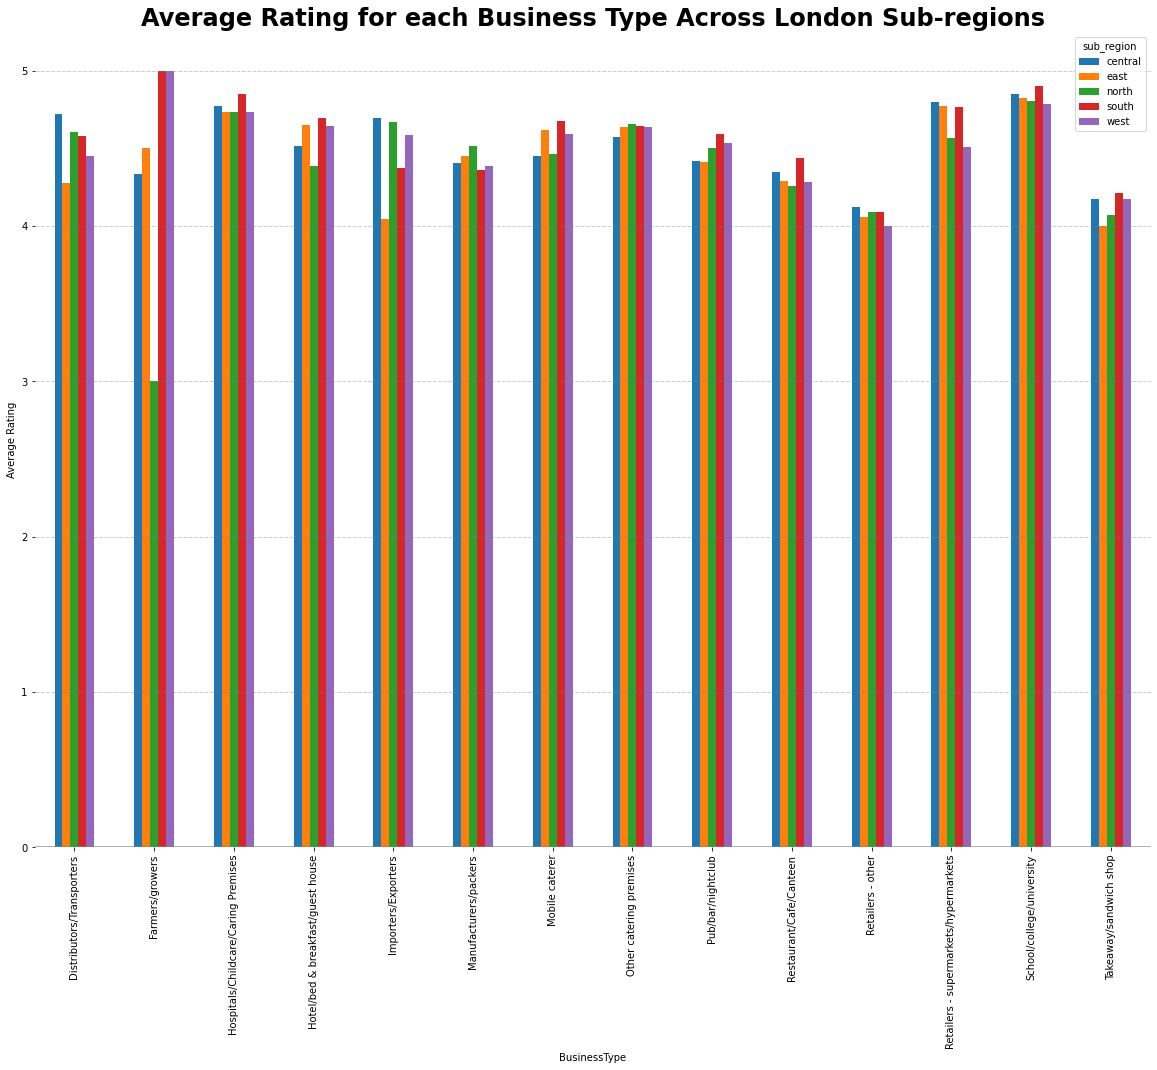

In [61]:
# Plot a bar chart using the DF
ax = avg_rating_subregion_btype.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(20, 15)

# Change the axes labels
ax.set_xlabel("BusinessType")
ax.set_ylabel("Average Rating")

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add x, y gridlines
ax.grid(b=True, axis='y', color='grey', linestyle='-.', linewidth=0.5, alpha=0.8)

# set horizontal line at y=0
ax.axhline(y=0, xmin=0, xmax=1, color='grey', linestyle='-', alpha=0.8)

# Add Plot Title
ax.set_title('Average Rating for each Business Type Across London Sub-regions', fontsize= 24, weight=600)

plt.show()

The performance of each business type is consistent across all sub-regions except for the `Farmers/growers` business type in which the north region performed signficantly worse than its counterparts. The `Hospitals/Childcare/Caring Premises` and `School/college/university` business types had excellent performance across all sub-regions. Similarly, the `Retailers - other` business type performed consistently across all sub-regions although the average ratings are just above 4.

## 10. Performance of Business Types Across Time

In [62]:
avg_rating_btype_year = pd.pivot_table(
    all_london_businesses_df, 
    values="RatingValue",
    index="RatingYear",
    columns="BusinessType", 
    aggfunc=np.mean
)

In [63]:
# return the business types as keys
btypes = dict_business_types_new.keys()

# convert the keys into a list
btypes = [*btypes]

# remove the 'other' business type
btypes.pop()

# view the list
btypes

['Restaurant/Cafe/Canteen',
 'Retailers - other',
 'Takeaway/sandwich shop',
 'Other catering premises',
 'Pub/bar/nightclub',
 'Hospitals/Childcare/Caring Premises',
 'School/college/university',
 'Retailers - supermarkets/hypermarkets',
 'Mobile caterer']

In [64]:
avg_rating_btype_year[btypes]

BusinessType,Restaurant/Cafe/Canteen,Retailers - other,Takeaway/sandwich shop,Other catering premises,Pub/bar/nightclub,Hospitals/Childcare/Caring Premises,School/college/university,Retailers - supermarkets/hypermarkets,Mobile caterer
RatingYear,,,,,,,,,
2002,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,4.000000,4.666667,NaN,4.500000,4.500000,5.000000,NaN,NaN,NaN
2004,4.000000,5.000000,NaN,NaN,4.166667,NaN,NaN,NaN,5.000000
2005,4.250000,5.000000,NaN,4.000000,3.800000,5.000000,NaN,NaN,NaN
2006,4.333333,4.666667,NaN,5.000000,4.500000,4.000000,NaN,4.500000,NaN
2007,4.666667,4.800000,NaN,NaN,4.750000,4.666667,5.000000,4.500000,NaN
2008,4.500000,4.250000,NaN,4.250000,4.400000,4.500000,5.000000,5.000000,NaN
2009,4.625000,4.562500,NaN,5.000000,4.636364,5.000000,4.000000,5.000000,NaN
2010,4.772727,4.566667,5.000000,4.666667,4.416667,4.285714,4.800000,5.000000,5.000000


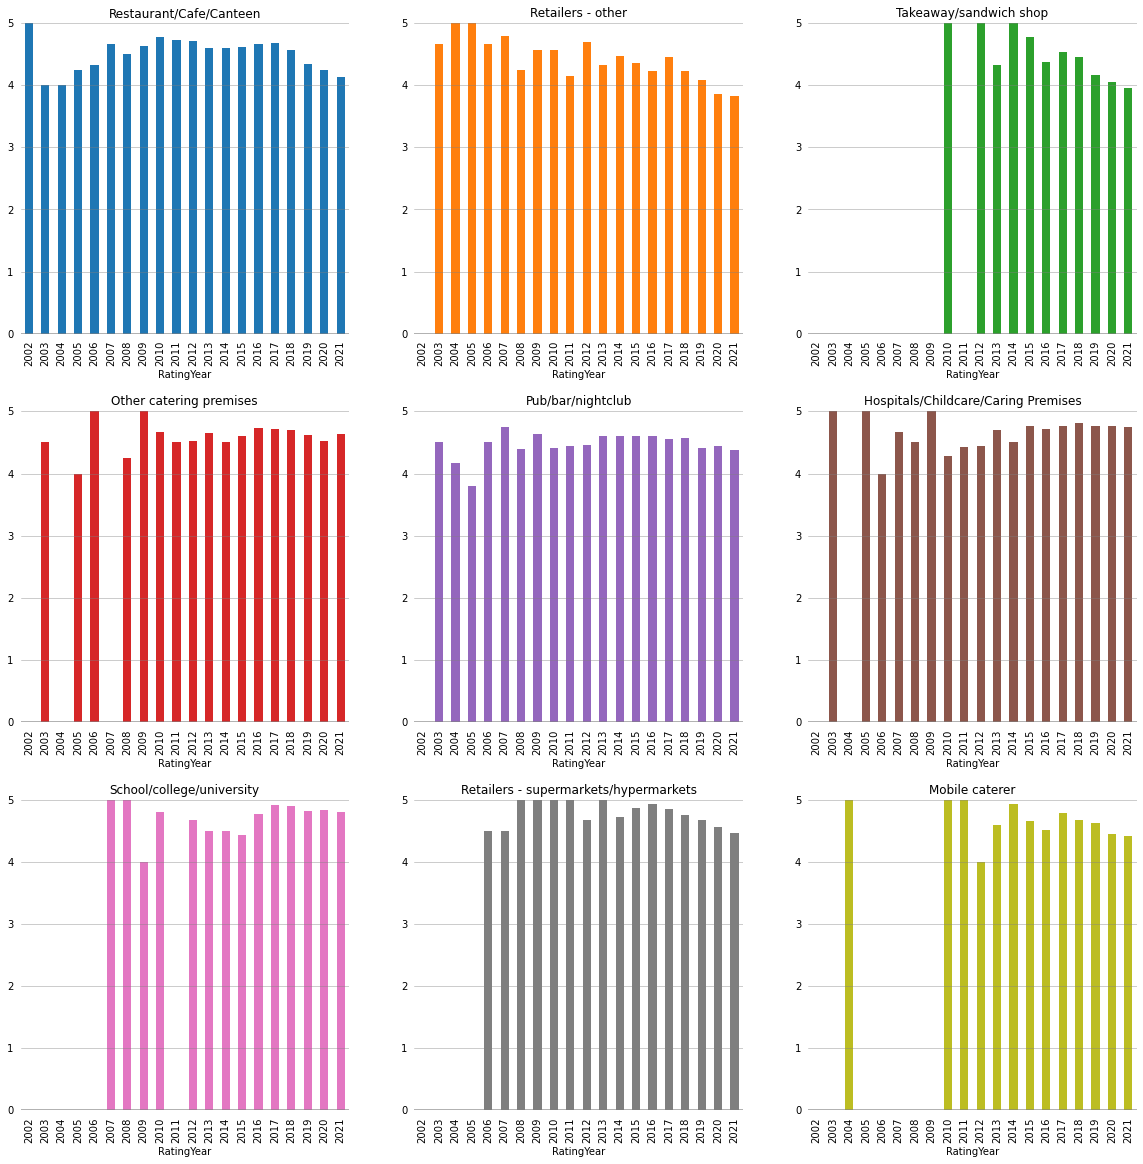

In [65]:
ax = avg_rating_btype_year[btypes].plot(kind='bar', subplots=True, layout=(3,3), figsize=(20,20), 
                          legend=False, sharex=False, ylim=(0,5))

for row in ax:
    for col in row:
        # Remove x, y Ticks
        col.xaxis.set_ticks_position('none')
        col.yaxis.set_ticks_position('none')

        # Add x, y gridlines
        col.grid(b=True, axis='y', color='grey', linewidth=0.5, alpha=0.8)
 
        # set horizontal line at y=0
        col.axhline(y=0, xmin=0, xmax=1, color='grey', linestyle='-', alpha=0.8)
        
        # remove the spines in each subplot
        for s in ['top', 'right', 'bottom', 'left']:
            col.spines[s].set_visible(False)
        
        fig = col.get_figure()

        # adjust spacing between all the subplots
        fig.subplots_adjust(hspace=0.25)

plt.show()

We can see from the bar charts above that in recent years (2018-2021) the `Restaurant/Cafe/Canteen`, `Retailers - other`, `Takeaway/sandwich shop`, `supermarkets/hypermarkets` and `Mobile caterer` business types have been awarded a lower rating value.	This may have occurred due to more stringent procceses being put in place thereby making it more difficult to achieve a higher rating.

## 11. Conclusions

* The majority of businesses registered with the FHRS are of the `Restaurant/Cafe/Canteen` type and account for almost 33%.


* The `Restaurant/Cafe/Canteen` business types are mostly located in central and east London.


* The best performing local authority is `Kensington and Chelsea` and the worst performing is `Waltham Forest`.


* The `School/college/university` and `Hospitals/Childcare/Caring Premises` business types had the highest average ratings.


* In the most recent years, rating values have decreased for the `Restaurant/Cafe/Canteen`, `Retailers - other`, `Takeaway/sandwich shop`, `supermarkets/hypermarkets` and `Mobile caterer` business types.